<a href="https://colab.research.google.com/github/lmbd92/st1800-st1801-trabajo3-2261/blob/main/Trabajo3Lina_Jose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Integrantes: Lina Beltrán (lbeltra1@eafit.edu.co), Jose Muñoz (jjmunozm@eafit.edu.co)

Materia: Alm. & Recu. de información.

Trabajo 3

Universidad EAFIT - Maestria ciencia en datos y analítica

Trabajo 2 Unidad 2 recuperación de texto

Data: https://github.com/lmbd92/st1800-st1801-trabajo3-2261/blob/main/Trabajo3/twitter.txt

# Abrir archivos desde GitHub

In [2]:
# OJO!!!! Ejecutar este bloque una sola vez (Por cada sesión iniciada en Colab)

!git clone -l -s https://github.com/lmbd92/st1800-st1801-trabajo3-2261.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 153, done.
remote: Counting objects: 100% (153/153), done.
remote: Compressing objects: 100% (146/146), done.
remote: Total 153 (delta 95), reused 17 (delta 5), pack-reused 0
Receiving objects: 100% (153/153), 39.63 MiB | 10.30 MiB/s, done.
Resolving deltas: 100% (95/95), done.
/content/cloned-repo
LICENSE    Trabajo3		    twitterClimateData.csv.zip
README.md  Trabajo3Lina_Jose.ipynb


In [ ]:
# Delete repo local colab (Usar solo en caso de requerir actualizar el repo desde Github Nuevamente)

#!rm -r /content/cloned-repo

**Nota:** Para guardar el notebook directamente en Github, dirigirse a File→Save a copy in GitHub

# Preparación de ambiente de trabajo (Dependencias/librerias)

In [3]:
# Transmisión eficiente de archivos muy grandes desde/hacia almacenamientos como S3, GCS, Azure Blob Storage, HDFS, WebHDFS
!pip install smart-open

# Modelado y procesamiento NLP
!pip install --upgrade gensim
!pip install nltk

# Interpretar el tema en un modelo de temas que se ha ajustado a un corpus
!pip install pyLDAvis

     |████████████████████████████████| 24.1 MB 1.5 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
     |████████████████████████████████| 1.7 MB 14.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=07dff0234768b0b090caadc0beea3252dfc68e605e4154a5e09d0f83325a2a38
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [4]:
import pandas as pd
import numpy as np
import nltk
import matplotlib as plt
# Soporte para expresiones regulares (RE).
import re

In [5]:
# nltk: tokenizador y stopwords

from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')
stop_words_nltk = set(stopwords.words('english'))
print(len(stopwords.words('english')))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.
179


In [6]:
#Lematizar, Stem
from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer
#
lancaster = LancasterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

In [7]:
#imprimir listas grandes
import pprint
from pprint import pprint

# Carga de Data Raw y EDA básico



In [8]:
# Carga de los datos

path_in = '/content/cloned-repo/Trabajo3/'
path_out = '/content/cloned-repo/Trabajo3/out/'
file_name = 'twitterClimateData.csv'

df = pd.read_csv(f'{path_in}{file_name}')
df.head()

,Unnamed: 0,id,author_id,text,retweets,permalink,date,formatted_date,favorites,mentions,...,location,text_clean,tb_sentiment_polarity,tb_sentiment_subjectivity,textBlob_sentiment,vader_compound,vader_pos,vader_neg,vader_neu,V_Sentiment
0,0,1.211810e+18,7.590000e+17,"2020 is the year we #votethemout, the year we ...",15,https://twitter.com/Sphiamia/status/1211807074...,2019-12-31 00:31:35+00:00,Tue Dec 31 00:31:35 +0000 2019,46,NaN,...,"California, USA",2020 is the year we votethemout the year we cl...,-0.100000,0.462500,negative,-0.5682,0.000,0.131,0.869,Negative
1,1,1.210670e+18,2.219547e+07,Winter has not stopped this group of dedicated...,9,https://twitter.com/StephDujarric/status/12106...,2019-12-27 20:56:21+00:00,Fri Dec 27 20:56:21 +0000 2019,35,NaN,...,"California, USA",Winter has not stopped this group of dedicated...,0.000000,0.000000,positive,0.5670,0.215,0.000,0.785,Positive
2,2,1.210590e+18,1.070000e+18,WEEK 55 of #ClimateStrike at the @UN. Next wee...,545,https://twitter.com/AlexandriaV2005/status/121...,2019-12-27 15:50:22+00:00,Fri Dec 27 15:50:22 +0000 2019,3283,@UN @Fridays4future,...,"California, USA",WEEK 55 of ClimateStrike at the UN Next week F...,0.166667,0.333333,positive,-0.8567,0.023,0.180,0.797,Negative
3,3,1.210260e+18,1.339821e+09,"A year of resistance, as youth protests shape...",1,https://twitter.com/EnergyHouseVA/status/12102...,2019-12-26 17:53:26+00:00,Thu Dec 26 17:53:26 +0000 2019,2,NaN,...,"California, USA",A year of resistance as youth protests shaped...,0.183333,0.600000,positive,0.7739,0.203,0.051,0.746,Positive
4,4,1.209640e+18,1.339821e+09,HAPPY HOLIDAYS #greta #gretathunberg #climate...,1,https://twitter.com/EnergyHouseVA/status/12096...,2019-12-25 00:56:37+00:00,Wed Dec 25 00:56:37 +0000 2019,4,NaN,...,"California, USA",HAPPY HOLIDAYS greta gretathunberg climatecha...,0.650000,0.800000,positive,0.9413,0.451,0.000,0.549,Positive


In [9]:
df.shape

(72405, 24)

In [10]:
df.count()

Unnamed: 0                   72405
id                           72405
author_id                    72405
text                         72405
retweets                     72405
permalink                    72405
date                         72405
formatted_date               72405
favorites                    72405
mentions                     27554
hashtags                     72402
geo                              0
urls                         33349
search_hashtags              72405
location                     72405
text_clean                   72405
tb_sentiment_polarity        72405
tb_sentiment_subjectivity    72405
textBlob_sentiment           72405
vader_compound               72405
vader_pos                    72405
vader_neg                    72405
vader_neu                    72405
V_Sentiment                  72405
dtype: int64

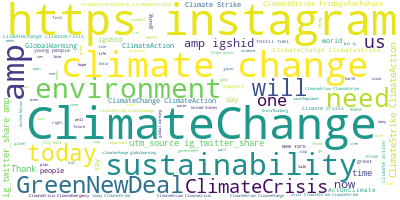

In [11]:
# Importar wordcloud Libreria
from wordcloud import WordCloud
# Unir palabras y caracteres Raw
long_string = ','.join(list(df['text'].values))
# Crear objeto de nube de palabras
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generar nube de palabras
wordcloud.generate(long_string)
# Visualización
wordcloud.to_image()

# Preparación de data, Nubes de tokens y Frecuencia

Definimos funcion para optimizar incluyendo stem y Lematización

In [12]:
def textprep(line):
    tokens = nltk.word_tokenize(str(line))
    tokens = [w.lower() for w in tokens if len(w)>1]
    tokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens]
    tokens = [w for w in tokens if w not in stop_words_nltk] 
    tokens= [wordnet_lemmatizer.lemmatize(w) for w in tokens]
    tokens= [lancaster.stem(w) for w in tokens]
    return tokens

In [13]:
#Filtramos solo la columna de interés
text_df = df[['text']]
text_df.head()

,text
0,"2020 is the year we #votethemout, the year we ..."
1,Winter has not stopped this group of dedicated...
2,WEEK 55 of #ClimateStrike at the @UN. Next wee...
3,"A year of resistance, as youth protests shape..."
4,HAPPY HOLIDAYS #greta #gretathunberg #climate...


In [14]:
# creación de columna con tokenización de la columna de interés especifica
text_df['tokens_twitter'] = text_df.apply(lambda row: textprep(row['text']), axis=1)
text_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,tokens_twitter
0,"2020 is the year we #votethemout, the year we ...","[2020, year, votethemout, year, climatestrik, ..."
1,Winter has not stopped this group of dedicated...,"[wint, stop, group, ded, clim, act, exampl, fo..."
2,WEEK 55 of #ClimateStrike at the @UN. Next wee...,"[week, 55, climatestrik, un, next, week, frida..."
3,"A year of resistance, as youth protests shape...","[year, resist, you, protest, shap, clim, chang..."
4,HAPPY HOLIDAYS #greta #gretathunberg #climate...,"[happy, holiday, gret, gretathunberg, climatec..."


Representación Frecuencia Visual del BoW optimizado

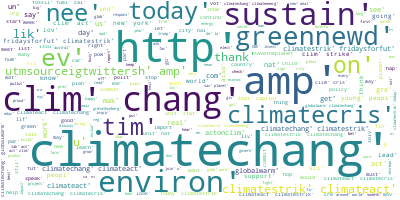

In [15]:
#Convertir Tokens en Lista y Str
tokens_twitter_list=text_df['tokens_twitter'].to_list()
tokens_twitter_str=" ".join([str(item) for item in tokens_twitter_list])
# Crear nube de palabras
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
# Generar nube de palabras
wordcloud.generate(tokens_twitter_str)
# Visualización
wordcloud.to_image()

# Características y representación

Construir el BoW (diccionario) de términos

In [16]:
# Creación del BoW - en gensim es Dictionary
from gensim.corpora import Dictionary
dictionary = Dictionary(text_df.tokens_twitter)
print(dictionary)

Dictionary(77295 unique tokens: ['2020', '33', 'climatestrik', 'don', 'els']...)


In [17]:
# Bag-of-words representacion de documentos.
corpus = [dictionary.doc2bow(line) for line in text_df.tokens_twitter]

In [ ]:
for i in corpus[:10]:
    print(i)

[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 4)]
[(2, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)]
[(0, 1), (2, 1), (6, 1), (15, 1), (16, 1), (17, 1), (24, 2), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 2)]
[(0, 1), (2, 1), (15, 1), (16, 1), (17, 2), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2)]
[(2, 1), (17, 1), (49, 1), (51, 1), (52, 1), (54, 1), (55, 1), (56, 1), (57, 2), (58, 1), (59, 1), (63, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1)]
[(2, 1), (17, 2), (36, 1), (50, 1), (52, 1), (54, 1), (56, 1), (57, 1), (78, 1), (79,

Construir matriz de documentos vs términos

In [18]:
# libreria para paralelizar
import multiprocessing as mp
import time

pool = mp.Pool(mp.cpu_count())
doc_term_matrix = pool.map(dictionary.doc2bow, [sentence for sentence in text_df.tokens_twitter])
pool.close()

In [ ]:
for i in doc_term_matrix[:10]:
    print(i)

[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 4)]
[(2, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)]
[(0, 1), (2, 1), (6, 1), (15, 1), (16, 1), (17, 1), (24, 2), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 2)]
[(0, 1), (2, 1), (15, 1), (16, 1), (17, 2), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2)]
[(2, 1), (17, 1), (49, 1), (51, 1), (52, 1), (54, 1), (55, 1), (56, 1), (57, 2), (58, 1), (59, 1), (63, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1)]
[(2, 1), (17, 2), (36, 1), (50, 1), (52, 1), (54, 1), (56, 1), (57, 1), (78, 1), (79,

# Modelo no supervisado LDA

In [19]:
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models, similarities
from gensim.models import CoherenceModel


Corremos el modelo LDA para valores entre 15 y 20, se evalua y se escoge el correspondiente al accuracy más alto. Para esto se ha utilizado la métrica "Coherence"

In [ ]:
"""for i in range(15,20):
  lda_model2 = models.LdaModel(corpus=corpus,id2word=dictionary,num_topics=i, passes=5, alpha='auto')

  # Compute Coherence Score
  coherence_model_lda = CoherenceModel(model=lda_model2, texts=text_df['tokens_twitter'], dictionary=dictionary, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  print('Coherence Score :', coherence_lda)"""


"for i in range(15,20):\n  lda_model2 = models.LdaModel(corpus=corpus,id2word=dictionary,num_topics=i, passes=5, alpha='auto')\n\n  # Compute Coherence Score\n  coherence_model_lda = CoherenceModel(model=lda_model2, texts=text_df['tokens_twitter'], dictionary=dictionary, coherence='c_v')\n  coherence_lda = coherence_model_lda.get_coherence()\n  print('Coherence Score :', coherence_lda)"

El mejor modelo se optiene con un número de Topics **igual a 15**

A continuación, se presenta una gráfica que muestra el Score de la métrica Coherence Vs. la cantidad K de tópicos. Este análisis se hizo en el siguiente artículo de Web: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#12buildingthetopicmodel

![picture](https://drive.google.com/uc?export=view&id=11sf_j3B_e9rpuHSrYTEYw2eEyw90-dip)

Podríamos definir una función para nuestro caso y realizar una gráfica similar, pero para efectos académicos y de reducción de recursos computacionales y tiempo, consideraremos el análisis anterior hecho con el ciclo For para valores de K entre 15 y 20 y la gráfica anterior

Con K = 15 y vecinos a 15 se obtienen resultados considerables buenos para el Accuracy del modelo, así que en este caso hemos decidido trabajar con **15 Topics**

In [20]:
lda_model2 = models.LdaModel(corpus=corpus,id2word=dictionary,num_topics=15, passes=5, alpha='auto')

In [21]:
def assigntopic(doc):
    vector = lda_model2[dictionary.doc2bow(doc)] 
    # opción 1: todos los tópicos ordenados de mayor a menor, podria ser topN tambien asi: return vector[:5] n=5
    #vector = sorted(vector, key=lambda item: -item[1])
    # opción 2: asignar el tópico mayor a cada documento
    vector = max(vector,key=lambda item: item[1])
    return vector

In [22]:
text_df['topics'] = text_df.apply(lambda row: assigntopic(row['tokens_twitter']), axis=1)
text_df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,tokens_twitter,topics
0,"2020 is the year we #votethemout, the year we ...","[2020, year, votethemout, year, climatestrik, ...","(12, 0.38968447)"
1,Winter has not stopped this group of dedicated...,"[wint, stop, group, ded, clim, act, exampl, fo...","(12, 0.46996787)"
2,WEEK 55 of #ClimateStrike at the @UN. Next wee...,"[week, 55, climatestrik, un, next, week, frida...","(12, 0.48442078)"
3,"A year of resistance, as youth protests shape...","[year, resist, you, protest, shap, clim, chang...","(5, 0.2869053)"
4,HAPPY HOLIDAYS #greta #gretathunberg #climate...,"[happy, holiday, gret, gretathunberg, climatec...","(5, 0.25182492)"
5,10 Questions to Ask Politicians About Climate...,"[10, quest, ask, polit, clim, chang, http, www...","(12, 0.3663139)"
6,#climatestrike #FridaysForFuture #portraits #u...,"[climatestrik, fridaysforfut, portrait, unique...","(12, 0.32432583)"
7,#ClimateChangeIsReal #ClimateStrike #ClimateAc...,"[climatechangeisr, climatestrik, climateaction...","(12, 0.2871909)"
8,My oldest daughter finding inspiration and enc...,"[oldest, daught, find, inspir, enco, fut, read...","(12, 0.30275095)"
9,Our toddler #POTUS whined this week about #Tim...,"[toddl, pot, whin, week, tim, magazin, pick, g...","(9, 0.46027368)"


Convertimos la columna de Topics en una Lista

In [23]:
topic_list = text_df['topics'].to_list()
print(topic_list)

[(12, 0.38968447), (12, 0.46996787), (12, 0.48442078), (5, 0.2869053), (5, 0.25182492), (12, 0.3663139), (12, 0.32432583), (12, 0.2871909), (12, 0.30275095), (9, 0.46027368), (12, 0.5254088), (12, 0.23753019), (12, 0.41510984), (12, 0.4507797), (12, 0.49838543), (12, 0.7166318), (11, 0.348208), (12, 0.37866464), (12, 0.39308685), (12, 0.37469655), (12, 0.41900155), (12, 0.7067073), (12, 0.62409204), (12, 0.33473086), (12, 0.34296295), (12, 0.43514183), (12, 0.40234062), (12, 0.35907745), (12, 0.36639482), (12, 0.38530537), (1, 0.36765435), (12, 0.2916433), (12, 0.39899123), (12, 0.41387504), (12, 0.26427007), (12, 0.3214313), (12, 0.255585), (12, 0.34618276), (12, 0.41180125), (12, 0.5328762), (12, 0.6327766), (12, 0.4691089), (12, 0.7058423), (12, 0.35395923), (12, 0.33982787), (12, 0.31285697), (12, 0.25926256), (12, 0.4082834), (1, 0.58043057), (12, 0.4908061), (2, 0.46839416), (12, 0.6539965), (12, 0.29269272), (12, 0.48908827), (12, 0.5436083), (12, 0.5311793), (12, 0.3847866), (1

Con esto queremos obtener solamente el ID del Topic con mayor probabilidad para cada Documento

In [24]:
topic_id = [i[0] for i in topic_list]
print(topic_id)

[12, 12, 12, 5, 5, 12, 12, 12, 12, 9, 12, 12, 12, 12, 12, 12, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 1, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 1, 12, 2, 12, 12, 12, 12, 12, 12, 12, 12, 10, 10, 12, 12, 12, 12, 10, 11, 12, 12, 12, 12, 12, 12, 12, 12, 8, 12, 12, 12, 12, 12, 2, 9, 12, 12, 6, 6, 6, 12, 12, 12, 12, 12, 12, 6, 12, 9, 2, 12, 12, 12, 12, 12, 12, 12, 2, 12, 12, 12, 12, 12, 12, 12, 12, 2, 12, 12, 12, 12, 12, 2, 12, 12, 12, 12, 12, 12, 4, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 5, 12, 12, 12, 12, 12, 12, 3, 10, 12, 12, 8, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 1, 12, 12, 12, 12, 12, 7, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 3, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 10, 12, 12, 12, 12, 12, 12, 12, 9, 12, 12, 12, 12, 12, 12, 2, 12, 2, 12, 12, 12, 2, 12, 12, 12, 12, 12, 12, 12, 12, 12, 

In [25]:
text_df['topic_id'] = topic_id
text_df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,tokens_twitter,topics,topic_id,tokens_twitter_str
0,"2020 is the year we #votethemout, the year we ...","[2020, year, votethemout, year, climatestrik, ...","(12, 0.38968447)",12,"['2020', 'year', 'votethemout', 'year', 'clima..."
1,Winter has not stopped this group of dedicated...,"[wint, stop, group, ded, clim, act, exampl, fo...","(12, 0.46996787)",12,"['2020', 'year', 'votethemout', 'year', 'clima..."
2,WEEK 55 of #ClimateStrike at the @UN. Next wee...,"[week, 55, climatestrik, un, next, week, frida...","(12, 0.48442078)",12,"['2020', 'year', 'votethemout', 'year', 'clima..."
3,"A year of resistance, as youth protests shape...","[year, resist, you, protest, shap, clim, chang...","(5, 0.2869053)",5,"['2020', 'year', 'votethemout', 'year', 'clima..."
4,HAPPY HOLIDAYS #greta #gretathunberg #climate...,"[happy, holiday, gret, gretathunberg, climatec...","(5, 0.25182492)",5,"['2020', 'year', 'votethemout', 'year', 'clima..."
5,10 Questions to Ask Politicians About Climate...,"[10, quest, ask, polit, clim, chang, http, www...","(12, 0.3663139)",12,"['2020', 'year', 'votethemout', 'year', 'clima..."
6,#climatestrike #FridaysForFuture #portraits #u...,"[climatestrik, fridaysforfut, portrait, unique...","(12, 0.32432583)",12,"['2020', 'year', 'votethemout', 'year', 'clima..."
7,#ClimateChangeIsReal #ClimateStrike #ClimateAc...,"[climatechangeisr, climatestrik, climateaction...","(12, 0.2871909)",12,"['2020', 'year', 'votethemout', 'year', 'clima..."
8,My oldest daughter finding inspiration and enc...,"[oldest, daught, find, inspir, enco, fut, read...","(12, 0.30275095)",12,"['2020', 'year', 'votethemout', 'year', 'clima..."
9,Our toddler #POTUS whined this week about #Tim...,"[toddl, pot, whin, week, tim, magazin, pick, g...","(9, 0.46027368)",9,"['2020', 'year', 'votethemout', 'year', 'clima..."


Cortamos el DF final para que no colapse Colab con la RAM máxima y nombramos una nueva columna donde estarán los "Destokens" explicado más adelante

In [33]:
# Se crea columna objetivo para almacenar los tokens como texto plano nuevamente sin stopwords
text_df['destokens_twitter']=''
text_df=text_df.head(500)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
type(text_df)
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72405 entries, 0 to 72404
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   text                 72405 non-null  object
 1   tokens_twitter       72405 non-null  object
 2   topics               72405 non-null  object
 3   topic_id             72405 non-null  int64 
 4   tokens_twitter_str   72405 non-null  object
 5   tokens_twitter_str2  72405 non-null  object
dtypes: int64(1), object(5)
memory usage: 3.3+ MB


Loop para poblar la nueva columna 'destokens_twitter'. La columna de tokens ahora se coloca "Destokenizada" porque el modelo en NB no soporta listas

In [35]:
# loop para poblar la nueva columna 'destokens_twitter'

from nltk.tokenize.treebank import TreebankWordDetokenizer
index= len(text_df['tokens_twitter'])
print(index)
for i in range(0,index):
  myListToStr =  TreebankWordDetokenizer().detokenize(text_df.loc[i,'tokens_twitter'])
  text_df.loc[i,'destokens_twitter'] = myListToStr


500


In [36]:
text_df.head(500)

,text,tokens_twitter,topics,topic_id,tokens_twitter_str,tokens_twitter_str2,destokens_twitter_,destokens_twitter
0,"2020 is the year we #votethemout, the year we ...","[2020, year, votethemout, year, climatestrik, ...","(12, 0.38968447)",12,"['2020', 'year', 'votethemout', 'year', 'clima...",2020 year votethemout year climatestrik heart ...,,2020 year votethemout year climatestrik heart ...
1,Winter has not stopped this group of dedicated...,"[wint, stop, group, ded, clim, act, exampl, fo...","(12, 0.46996787)",12,"['2020', 'year', 'votethemout', 'year', 'clima...",wint stop group ded clim act exampl follow cli...,,wint stop group ded clim act exampl follow cli...
2,WEEK 55 of #ClimateStrike at the @UN. Next wee...,"[week, 55, climatestrik, un, next, week, frida...","(12, 0.48442078)",12,"['2020', 'year', 'votethemout', 'year', 'clima...",week 55 climatestrik un next week fridays4futu...,,week 55 climatestrik un next week fridays4futu...
3,"A year of resistance, as youth protests shape...","[year, resist, you, protest, shap, clim, chang...","(5, 0.2869053)",5,"['2020', 'year', 'votethemout', 'year', 'clima...",year resist you protest shap clim chang discus...,,year resist you protest shap clim chang discus...
4,HAPPY HOLIDAYS #greta #gretathunberg #climate...,"[happy, holiday, gret, gretathunberg, climatec...","(5, 0.25182492)",5,"['2020', 'year', 'votethemout', 'year', 'clima...",happy holiday gret gretathunberg climatechang ...,,happy holiday gret gretathunberg climatechang ...
...,...,...,...,...,...,...,...,...
495,Wheeled carbon emitting armor machines held up...,"[wheel, carbon, emit, arm, machin, held, nassa...","(12, 0.33363277)",12,"['2020', 'year', 'votethemout', 'year', 'clima...",wheel carbon emit arm machin held nassau st bl...,,wheel carbon emit arm machin held nassau st bl...
496,70% of Americans want climate action. Why has ...,"[70, am, want, clim, act, noth, don, bc, fossi...","(8, 0.44769996)",8,"['2020', 'year', 'votethemout', 'year', 'clima...",70 am want clim act noth don bc fossil fuel in...,,70 am want clim act noth don bc fossil fuel in...
497,It’s fairly safe to say that my protesting pup...,"[fair, saf, say, protest, pup, among, popul, a...","(12, 0.1823016)",12,"['2020', 'year', 'votethemout', 'year', 'clima...",fair saf say protest pup among popul attend cl...,,fair saf say protest pup among popul attend cl...
498,#ClimateStrike DC was giant and full of young ...,"[climatestrik, dc, giant, ful, young, peopl, e...","(12, 0.31653598)",12,"['2020', 'year', 'votethemout', 'year', 'clima...",climatestrik dc giant ful young peopl emot cal...,,climatestrik dc giant ful young peopl emot cal...


In [31]:
# Imprimir Keyword en los topics
pprint(lda_model2.print_topics())
doc_lda = lda_model2[corpus]


[(0,
  '0.569*"" + 0.015*"record" + 0.010*"youtub" + 0.009*"die" + 0.009*"travel" + '
  '0.008*"revolv" + 0.007*"stem" + 0.007*"mark" + 0.007*"network" + '
  '0.007*"brazil"'),
 (1,
  '0.058*"fir" + 0.053*"via" + 0.049*"fin" + 0.044*"fuel" + 0.039*"fossil" + '
  '0.034*"company" + 0.029*"invest" + 0.022*"mon" + 0.017*"fed" + '
  '0.016*"market"'),
 (2,
  '0.256*"climatestrik" + 0.075*"fridaysforfut" + 0.061*"gretathunberg" + '
  '0.040*"stat" + 0.030*"dc" + 0.030*"capitol" + 0.022*"strike" + 0.022*"you" '
  '+ 0.020*"unit" + 0.019*"kid"'),
 (3,
  '0.031*"produc" + 0.027*"team" + 0.024*"sum" + 0.021*"reus" + 0.020*"modern" '
  '+ 0.020*"hot" + 0.020*"cool" + 0.016*"glad" + 0.016*"destroy" + '
  '0.015*"specy"'),
 (4,
  '0.049*"le" + 0.037*"plast" + 0.033*"cent" + 0.028*"carbon" + 0.027*"busy" + '
  '0.025*"emit" + 0.025*"reduc" + 0.019*"respons" + 0.018*"flood" + '
  '0.018*"univers"'),
 (5,
  '0.171*"sustain" + 0.154*"http" + 0.104*"amp" + 0.091*"environ" + '
  '0.023*"utmsourceigtwitt

In [37]:
len(lda_model2.print_topics())

15

Analizando Resultados del LDA 

In [38]:
#from pyLDAvis 
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle 

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [39]:
# Visualización de topics
pyLDAvis.enable_notebook()

if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model2, corpus, dictionary)
    with open("/content/cloned-repo/Trabajo3/out", 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

with open("/content/cloned-repo/Trabajo3/out", 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/content/cloned-repo/Trabajo3/out.html')
LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12     0.387595  0.085183       1        1  38.623235
5      0.153353 -0.381590       2        1   9.903117
8      0.187929  0.067027       3        1   9.276264
2      0.118910  0.194453       4        1   7.309664
10     0.014189  0.009118       5        1   4.886981
11    -0.017978 -0.112040       6        1   4.682399
4     -0.087267 -0.004027       7        1   3.741632
14    -0.044864  0.006954       8        1   3.620255
9     -0.062460  0.036973       9        1   3.566906
7     -0.088459  0.006086      10        1   3.099217
6     -0.082739  0.037008      11        1   2.933049
0     -0.116888  0.014724      12        1   2.568216
3     -0.120125  0.011726      13        1   2.251544
13    -0.126919  0.009062      14        1   1.831835
1     -0.114277  0.019343      15        1   1.705685, topic_info=              Term          Freq         Total Category  logprob  loglift
126                 16828.000000  16828.000000  Default  30.0000  30.0000
2     climatestrik  21599.000000  21599.000000  Default  29.0000  29.0000
88         sustain  19482.000000  19482.000000  Default  28.0000  28.0000
57            http  19206.000000  19206.000000  Default  27.0000  27.0000
250            amp  13789.000000  13789.000000  Default  26.0000  26.0000
...            ...           ...           ...      ...      ...      ...
334         invest    562.675797    903.422861  Topic15  -3.5525   3.5977
738           word    273.188555    422.108506  Topic15  -4.2751   3.6361
3345          cold    152.950549    232.322805  Topic15  -4.8551   3.6532
226           bank    165.379042    307.761634  Topic15  -4.7770   3.4501
1085         espec    129.129013    519.818956  Topic15  -5.0244   2.6785

[608 rows x 6 columns], token_table=      Topic      Freq                Term
term                                     
126      12  0.999951                    
78       10  0.998060                  10
580      10  0.343508                 100
580      14  0.654220                 100
1189      7  0.014164                  12
...     ...       ...                 ...
1848     13  0.995158        youthforclim
3350     12  0.995878              youtub
1495     15  0.986472  youtubeehg2h9ryplq
3106     14  0.996977                zero
90        2  0.998120            zerowast

[795 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 6, 9, 3, 11, 12, 5, 15, 10, 8, 7, 1, 4, 14, 2])

# Modelo Clasificación NB

Creamos un nuevo DF con las columnas de interés para la aplicación del NAIVE BAYES. En este caso se escoge la columna del BoW Tokenizado Optimizado y la columna de los Topics más relevantes de cada Doc

In [40]:
tokens_topics_df= text_df[['destokens_twitter','topic_id']]
tokens_topics_df.head(10)

,destokens_twitter,topic_id
0,2020 year votethemout year climatestrik heart ...,12
1,wint stop group ded clim act exampl follow cli...,12
2,week 55 climatestrik un next week fridays4futu...,12
3,year resist you protest shap clim chang discus...,5
4,happy holiday gret gretathunberg climatechang ...,5
5,10 quest ask polit clim chang http wwwmomsclea...,12
6,climatestrik fridaysforfut portrait uniquechri...,12
7,climatechangeisr climatestrik climateactionnow,12
8,oldest daught find inspir enco fut read tim pe...,12
9,toddl pot whin week tim magazin pick gretathur...,9


,tokens_twitter
topic_id,
0,6294
1,31
2,174
3,551
4,89
5,36
6,216
7,45302
8,172


<Figure size 576x432 with 0 Axes>

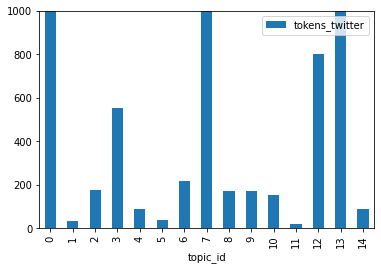

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
tokens_topics_df.groupby('topic_id').count().plot.bar(ylim=0)
plt.ylim(0,1000)
tokens_topics_df.groupby('topic_id').count()

Caracterización de los Tokens

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', stop_words='english')
features = tfidf.fit_transform(tokens_topics_df.destokens_twitter).toarray()
labels = tokens_topics_df.topic_id
features.shape

(500, 239)

Modelo NB

In [73]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
rom sklearn.naive_bayes import MultinomialNB
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(tokens_topics_df['destokens_twitter'])
encoder = LabelEncoder()
y = encoder.fit_transform(tokens_topics_df['topic_id'])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
nb = MultinomialNB()
clf=nb.fit(X_train, y_train)

In [75]:
y_pred=clf.predict(X_test)

In [76]:
len(y_pred)

100

Accuracy

In [67]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.79

f1 Score

In [90]:
# f1 Score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred,average='weighted')

0.7705701078582434

# REFERENCIAS 

https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

https://datascienceplus.com/multi-class-text-classification-with-scikit-learn/ 

https://stackoverflow.com/questions/47438313/how-to-predict-after-training-data-using-naive-bayes-with-python